TODO:

- Makegrid
- Original settings of paper

## Setup
<a id="setup"></a>

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Config
<a id="setup_config"></a>

In [56]:
import assignment.config as config

config.list_available()

['celeba_dcgan', 'celeba_unnormalized', 'svhn_cdcgan', 'svhn_unnormalized']

### Modules
<a id="setup_modules"></a>

In [57]:
from pathlib import Path

import assignment.scripts.init_exp as init_exp
import assignment.scripts.compute_mean_and_std as compute_mean_and_std
from assignment.evaluation.evaluator import Evaluator
from assignment.training.trainer_gan import Trainer
import assignment.libs.factory as factory
import assignment.libs.utils_checkpoints as utils_checkpoints
import assignment.libs.utils_data as utils_data
import assignment.libs.utils_model as utils_model
import assignment.visualization.plot as plot
import assignment.visualization.visualize as visualize

### Paths and names
<a id="setup_paths_and_names"></a>

In [58]:
name_exp_svhn_unnormalized = "svhn_unnormalized"
name_exp_celeba_unnormalized = "celeba_unnormalized"
name_exp_svhn_cdcgan = "svhn_cdcgan"
name_exp_celeba_dcgan = "celeba_dcgan"

path_dir_exp_svhn_cdcgan = Path(config._PATH_DIR_EXPS) / name_exp_svhn_cdcgan
path_dir_exp_celeba_dcgan = Path(config._PATH_DIR_EXPS) / name_exp_celeba_dcgan

## Data

### SVHN

In [52]:
compute_mean_and_std.compute_mean_and_std(name_config=name_exp_svhn_unnormalized, split="training")

Computing mean and standard deviation ...
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/svhn_unnormalized.yaml
Using downloaded and verified file: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/svhn/train_32x32.mat
Dataset
Dataset SVHN
    Number of samples: 58605
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/svhn
    Split: training
    Transform of samples: Compose(
      PILToTensor()
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
)
    Transform of targets: None
Mean: tensor([0.4375, 0.4436, 0.4727])
Standard deviation: tensor([0.1979, 0.2009, 0.1968])
Computing mean and standard deviation finished


In [62]:
init_exp.init_exp(name_exp=name_exp_svhn_cdcgan, name_config=name_exp_svhn_cdcgan)

Initializing experiment svhn_cdcgan...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/svhn_cdcgan.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/config.yaml
Initializing experiment svhn_cdcgan fini

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/config.yaml


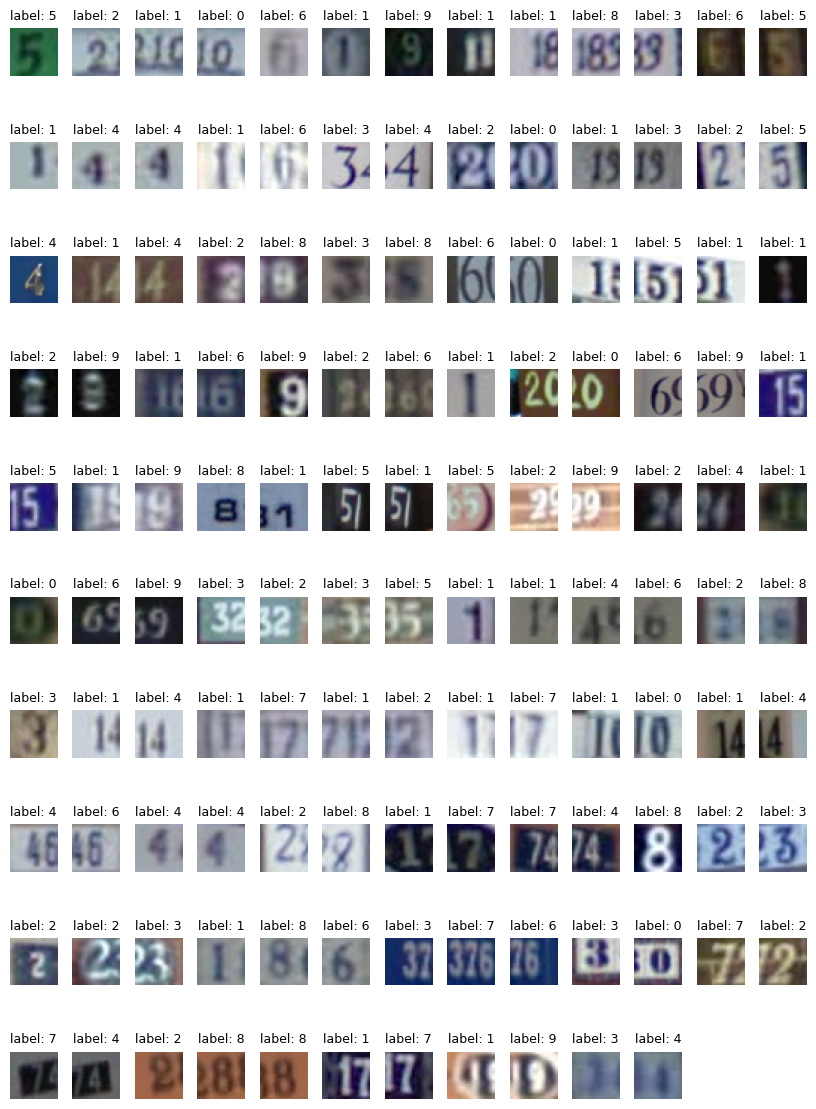

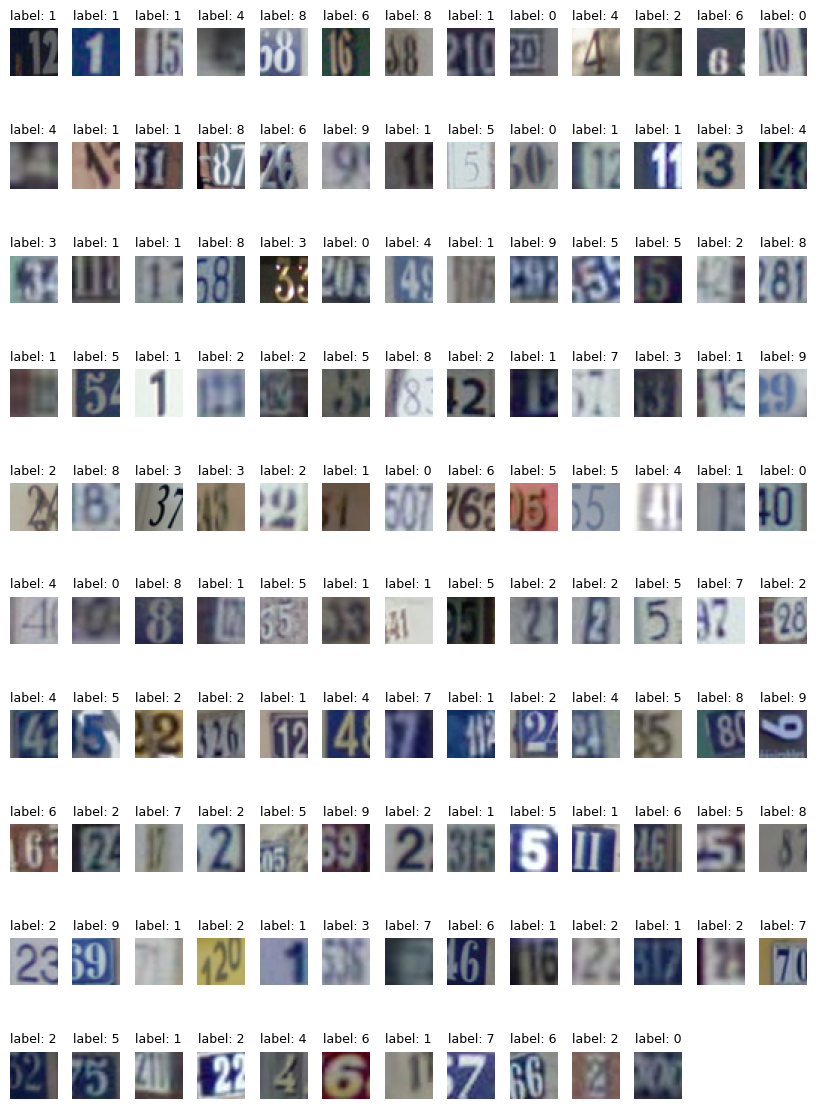

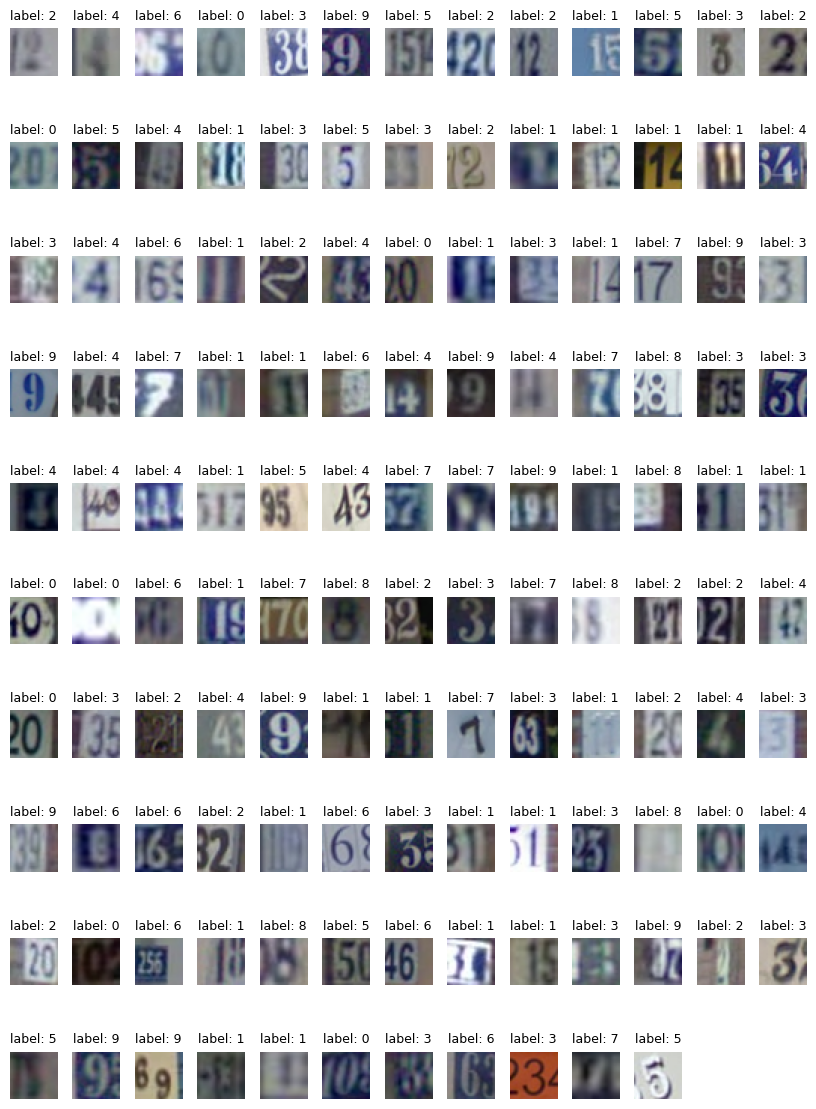

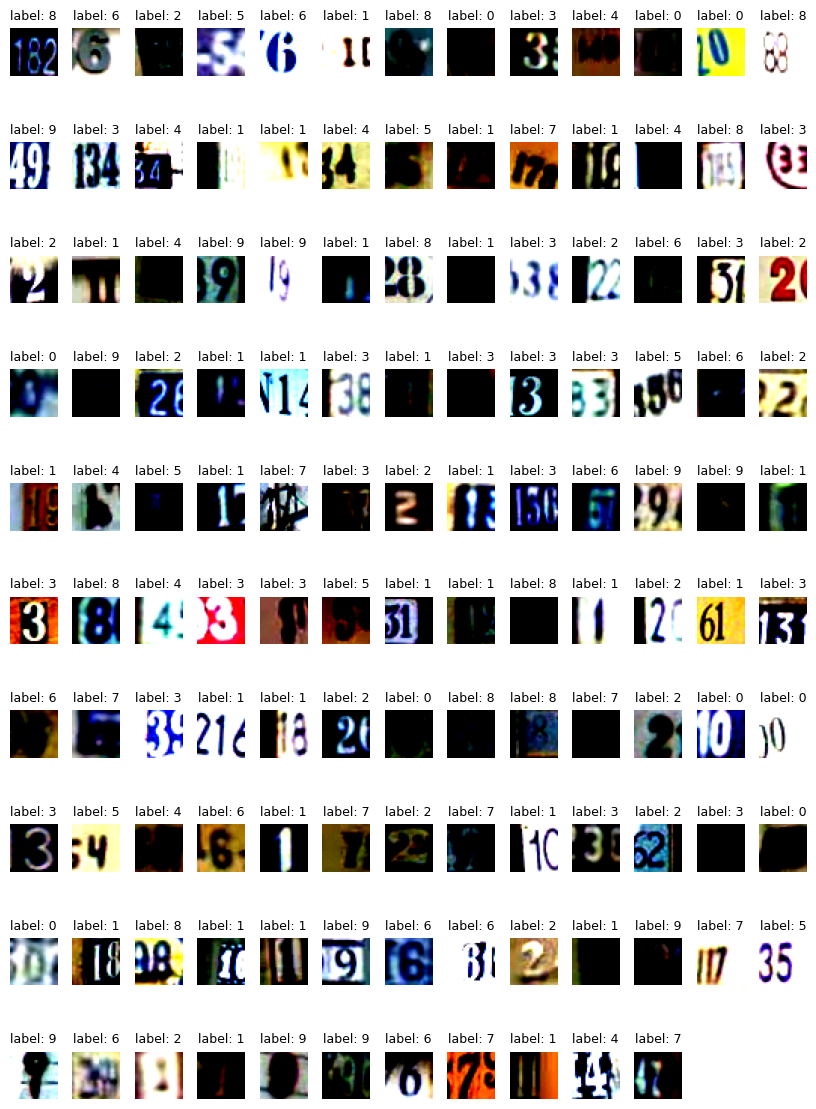

In [63]:
config.set_config_exp(path_dir_exp_svhn_cdcgan)

splits = ["test", "validation", "training", "training"]
uses_unnormalize = [True, True, True, False]

for split, use_unnormalize in zip(splits, uses_unnormalize):
    features, target = utils_data.sample(split=split, use_unnormalize=use_unnormalize)

    path_save = path_dir_exp_svhn_cdcgan / "visualizations" / f"Sample_{split}{"" if use_unnormalize else "_normalized"}.png"
    visualize.visualize_images(features, labels=target, path_save=path_save)

### CelebA

In [54]:
compute_mean_and_std.compute_mean_and_std(name_config=name_exp_celeba_unnormalized, split="training")

Computing mean and standard deviation ...
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/celeba_unnormalized.yaml
Files already downloaded and verified
Dataset
Dataset CelebA
    Number of samples: 162770
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/celeba
    Split: training
    Transform of samples: Compose(
      PILToTensor()
      CenterCrop(size=[178, 178])
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
)
    Transform of targets: None
Mean: tensor([0.5084, 0.4224, 0.3768])
Standard deviation: tensor([0.3048, 0.2824, 0.2808])
Computing mean and standard deviation finished


In [64]:
init_exp.init_exp(name_exp=name_exp_celeba_dcgan, name_config=name_exp_celeba_dcgan)

Initializing experiment celeba_dcgan...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/celeba_dcgan.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/config.yaml
Initializing experiment celeba_

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/config.yaml


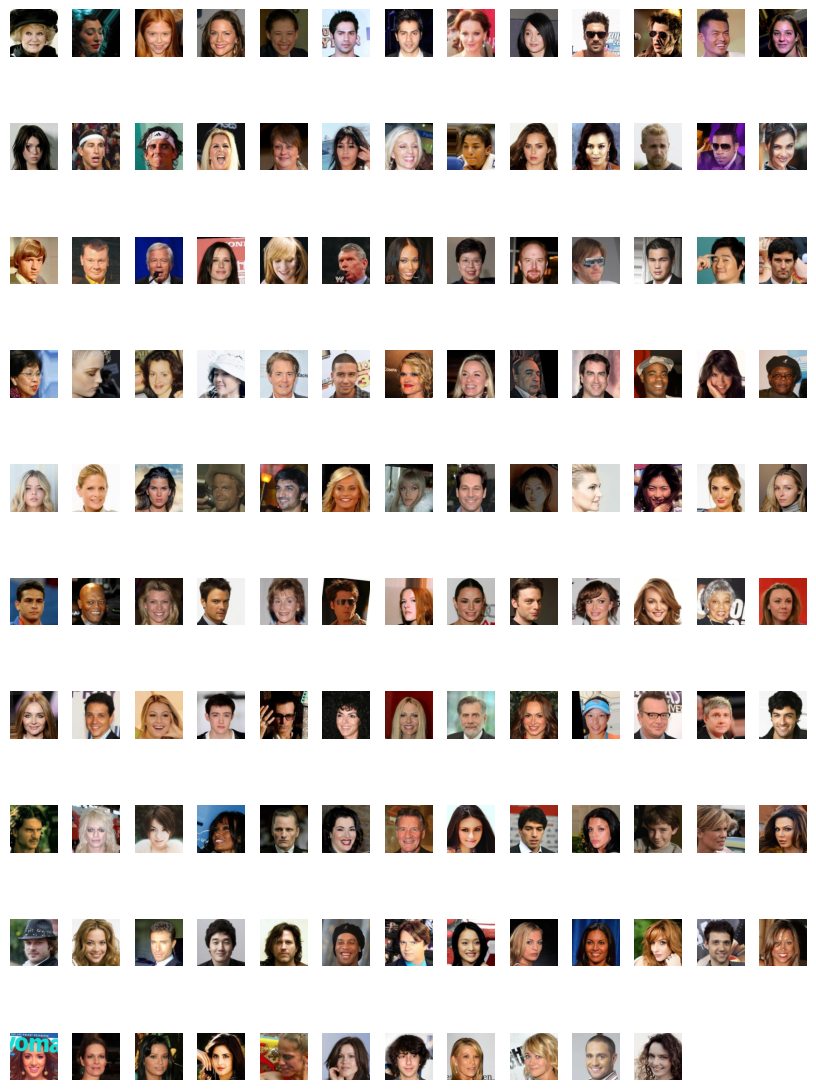

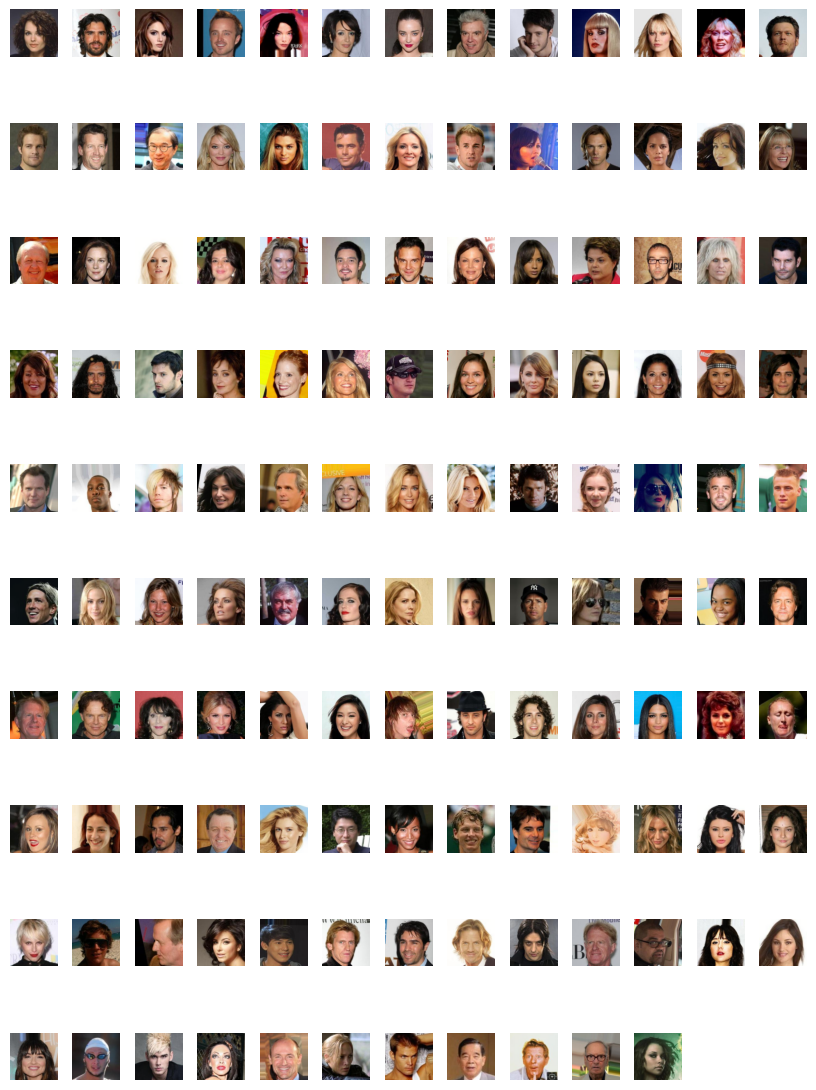

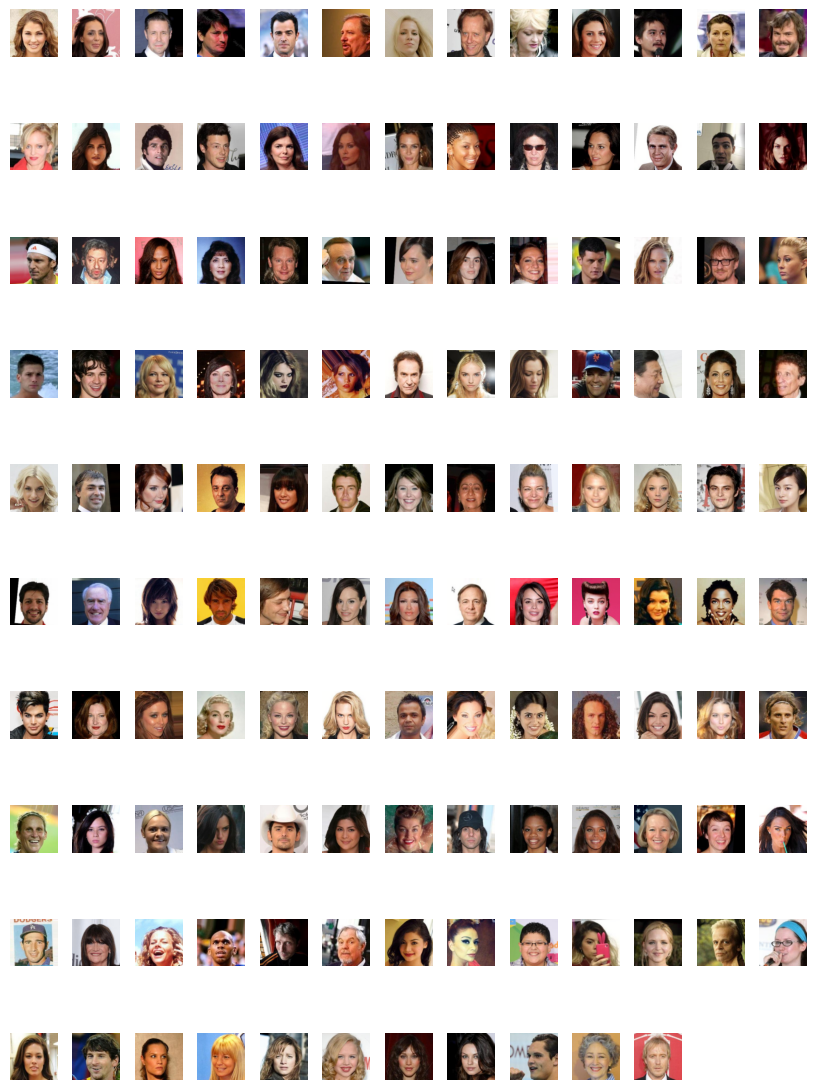

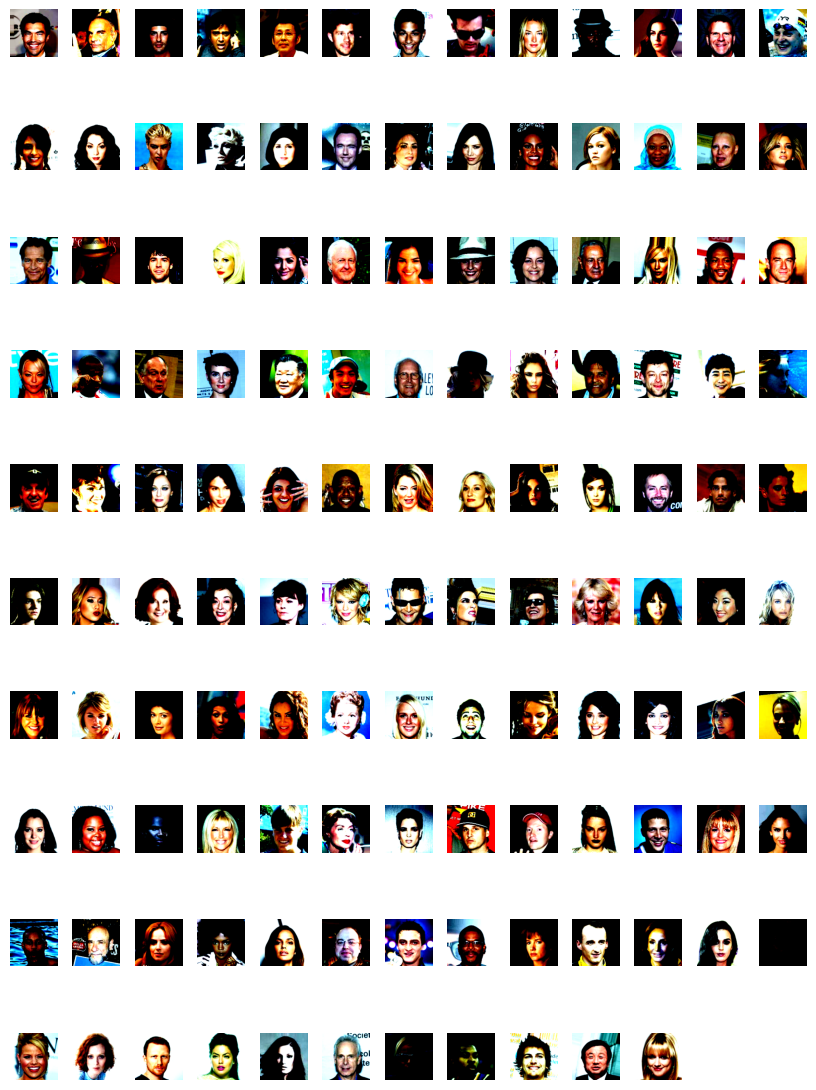

In [65]:
config.set_config_exp(path_dir_exp_celeba_dcgan)

splits = ["test", "validation", "training", "training"]
uses_unnormalize = [True, True, True, False]

for split, use_unnormalize in zip(splits, uses_unnormalize):
    features, target = utils_data.sample(split=split, use_unnormalize=use_unnormalize)

    path_save = path_dir_exp_celeba_dcgan / "visualizations" / f"Sample_{split}{"" if use_unnormalize else "_normalized"}.png"
    visualize.visualize_images(features, path_save=path_save)

## Experiments

### Conditional DCGAN on SVHN

In [ ]:
config.set_config_exp(path_dir_exp_svhn_cdcgan)

trainer = Trainer(name_exp_svhn_cdcgan)
trainer.loop(config.TRAINING["num_epochs"])

log = trainer.log
path_plots = path_dir_exp_svhn_cdcgan / "plots"
plot.plot_loss(log, path_save=path_plots / "Loss.png")
plot.plot_metrics(log, path_plots=path_plots)
plot.plot_learning_rate(log, path_save=path_plots / "Learning_rate.png")

### DCGAN on CelebA

In [ ]:
config.set_config_exp(path_dir_exp_celeba_dcgan)

trainer = Trainer(name_exp_celeba_dcgan)
trainer.loop(config.TRAINING["num_epochs"])

log = trainer.log
path_plots = path_dir_exp_celeba_dcgan / "plots"
plot.plot_loss(log, path_save=path_plots / "Loss.png")
plot.plot_metrics(log, path_plots=path_plots)
plot.plot_learning_rate(log, path_save=path_plots / "Learning_rate.png")

### Qualitative evaluation

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv12)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv12 / "checkpoints" / "best.pth")

output, target = utils_model.sample(model, split="test", num_samples=32)
output["prediction"] = output["prediction"].cpu()
target = target.cpu()

path_save = path_dir_exp_vaeconv12 / "visualizations" / "Predictions_test_normalized.png"
visualize.visualize_images_pairs(target, output["prediction"], path_save=path_save)

output["prediction"] = utils_data.unnormalize(output["prediction"], split="test")
target = utils_data.unnormalize(target, split="test")
path_save = path_dir_exp_vaeconv12 / "visualizations" / "Predictions_test.png"
visualize.visualize_images_pairs(target, output["prediction"], path_save=path_save)

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv13)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv13 / "checkpoints" / "best.pth")

output, target = utils_model.sample(model, split="test", num_samples=32)
output["prediction"] = output["prediction"].cpu()
target = target.cpu()

path_save = path_dir_exp_vaeconv13 / "visualizations" / "Predictions_test_normalized.png"
visualize.visualize_images_pairs(target, output["prediction"], path_save=path_save)

output["prediction"] = utils_data.unnormalize(output["prediction"], split="test")
target = utils_data.unnormalize(target, split="test")
path_save = path_dir_exp_vaeconv13 / "visualizations" / "Predictions_test.png"
visualize.visualize_images_pairs(target, output["prediction"], path_save=path_save)

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv14)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv14 / "checkpoints" / "best.pth")

output, target = utils_model.sample(model, split="test", num_samples=32)
output["prediction"] = output["prediction"].cpu()
target = target.cpu()

path_save = path_dir_exp_vaeconv14 / "visualizations" / "Predictions_test_normalized.png"
visualize.visualize_images_pairs(target, output["prediction"], path_save=path_save)

output["prediction"] = utils_data.unnormalize(output["prediction"], split="test")
target = utils_data.unnormalize(target, split="test")
path_save = path_dir_exp_vaeconv14 / "visualizations" / "Predictions_test.png"
visualize.visualize_images_pairs(target, output["prediction"], path_save=path_save)

### Inference

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv12)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv12 / "checkpoints" / "best.pth")
model = model.cuda()

samples = model.generate(num_samples=32)
samples = samples.cpu()
samples = utils_data.unnormalize(samples, split="test")

path_save = path_dir_exp_vaeconv12 / "visualizations" / "Samples_generated_unnormalized.png"
visualize.visualize_images(samples, path_save=path_save)

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv13)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv13 / "checkpoints" / "best.pth")
model = model.cuda()

samples = model.generate(num_samples=32)
samples = samples.cpu()
samples = utils_data.unnormalize(samples, split="test")

path_save = path_dir_exp_vaeconv13 / "visualizations" / "Samples_generated_unnormalized.png"
visualize.visualize_images(samples, path_save=path_save)

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv14)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv14 / "checkpoints" / "best.pth")
model = model.cuda()

samples = model.generate(num_samples=32)
samples = samples.cpu()
samples = utils_data.unnormalize(samples, split="test")

path_save = path_dir_exp_vaeconv14 / "visualizations" / "Samples_generated_unnormalized.png"
visualize.visualize_images(samples, path_save=path_save)

### Latent space analysis

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv14)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv14 / "checkpoints" / "best.pth")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_test, dataloader_test = factory.create_dataset_and_dataloader(split="test")

model = model.to(device)

features_flat, codes_latent = [], []
with torch.no_grad():
    progress_bar = tqdm(dataloader_test, total=len(dataloader_test))
    for i, (features, targets) in enumerate(progress_bar, start=1):
        features = features.to(device)
        targets = targets.to(device)

        output = model(features)
        code_latent = model.reparameterize(output["mean"], output["log_var"])

        features_flat += [features.view(features.shape[0], -1).cpu()]
        codes_latent += [code_latent.cpu()]

features_flat = np.concatenate(features_flat)
codes_latent = np.concatenate(codes_latent)

path_save = path_dir_exp_vaeconv14 / "plots" / "Projection_pca_samples.png"
plot.plot_projection_pca(features_flat, path_save=path_save)

path_save = path_dir_exp_vaeconv14 / "plots" / "Projection_pca_generated.png"
plot.plot_projection_pca(codes_latent, path_save=path_save)

path_save = path_dir_exp_vaeconv14 / "plots" / "Projection_tsne_samples.png"
plot.plot_projection_tsne(features_flat, path_save=path_save)

path_save = path_dir_exp_vaeconv14 / "plots" / "Projection_tsne_generated.png"
plot.plot_projection_tsne(codes_latent, path_save=path_save)

In [ ]:
@torch.no_grad()
def plot_reconstructed(model, xrange=(-3, 3), yrange=(-2, 2), resolution=12, path_save=None):
    """
    Sampling equispaced points from the latent space given the xrange and yrange,
    decoding latents and visualizing distribution of the space
    """
    model = model.to(device)

    SIZE = 128
    grid = np.empty((3, resolution * SIZE, resolution * SIZE))

    for i, y in enumerate(np.linspace(*yrange, resolution)):
        for j, x in enumerate(np.linspace(*xrange, resolution)):
            code_latent = torch.zeros(config.MODEL["kwargs"]["num_channels_latent"]).to(device)
            code_latent[0:5] = x
            code_latent[6:10] = y

            output = model.decode(code_latent).cpu()

            grid[:, (resolution - 1 - i) * SIZE : (resolution - i) * SIZE, j * SIZE : (j + 1) * SIZE] = output

    plt.figure(figsize=(12, 20))
    plt.imshow(grid.transpose((1, 2, 0)), extent=[*yrange, *xrange])
    plt.axis("off")

    plt.tight_layout()
    if path_save:
        plt.savefig(path_save)
    plt.show()

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv12)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv14 / "checkpoints" / "best.pth")

path_save = path_dir_exp_vaeconv12 / "visualizations" / "Equispace_generated.png"
plot_reconstructed(model, xrange=(-2, 2), yrange=(-2, 2), resolution=10, path_save=path_save)

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv13)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv14 / "checkpoints" / "best.pth")

path_save = path_dir_exp_vaeconv13 / "visualizations" / "Equispace_generated.png"
plot_reconstructed(model, xrange=(-2, 2), yrange=(-2, 2), resolution=10, path_save=path_save)

In [ ]:
config.set_config_exp(path_dir_exp_vaeconv14)

model = utils_checkpoints.load_model(path_dir_exp_vaeconv14 / "checkpoints" / "best.pth")

path_save = path_dir_exp_vaeconv14 / "visualizations" / "Equispace_generated.png"
plot_reconstructed(model, xrange=(-2, 2), yrange=(-2, 2), resolution=10, path_save=path_save)

### Interpolation

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_test, dataloader_test = factory.create_dataset_and_dataloader(split="test")

image1 = dataset_test[7][0]
image2 = dataset_test[11][0]

path_save = path_dir_exp_vaeconv12 / "visualizations" / "Endpoints_interpolation.png"
visualize.visualize_images(utils_data.unnormalize(torch.stack([image1, image2]), split="test"), path_save=path_save)

with torch.no_grad():
    mean, log_var = model.encode(torch.stack([image1, image2]).to(device))

std = torch.exp(0.5 * log_var)
latents = mean + std

latent1, latent2 = latents[0], latents[1]


@torch.no_grad()
def sample_interpolation(model, p1, p2, num_samples=15):
    """Sampling N points from the line that connects p1 and p2"""

    codes_latent = torch.stack([p1 * t + p2 * (1 - t) for t in torch.linspace(0, 1, num_samples).to(device)])
    output = model.decode(codes_latent)
    output = output.cpu()
    return output


decoded_imgs = utils_data.unnormalize(sample_interpolation(model, latent2, latent1, num_samples=12), split="test")

fig, ax = plt.subplots(1, len(decoded_imgs), figsize=(30, 3))
for i, img in enumerate(decoded_imgs):
    ax[i].imshow(img.permute(1, 2, 0))
    ax[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.subplots_adjust(wspace=0.0, hspace=0)
ax[0].set_title("Image 1")
ax[-1].set_title("Image 2")

path_save = path_dir_exp_vaeconv12 / "visualizations" / "Interpolation.png"

if path_save:
    plt.savefig(path_save)
plt.show()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_test, dataloader_test = factory.create_dataset_and_dataloader(split="test")

image1 = dataset_test[7][0]
image2 = dataset_test[11][0]

path_save = path_dir_exp_vaeconv13 / "visualizations" / "Endpoints_interpolation.png"
visualize.visualize_images(utils_data.unnormalize(torch.stack([image1, image2]), split="test"), path_save=path_save)

with torch.no_grad():
    mean, log_var = model.encode(torch.stack([image1, image2]).to(device))

std = torch.exp(0.5 * log_var)
latents = mean + std

latent1, latent2 = latents[0], latents[1]


@torch.no_grad()
def sample_interpolation(model, p1, p2, num_samples=15):
    """Sampling N points from the line that connects p1 and p2"""

    codes_latent = torch.stack([p1 * t + p2 * (1 - t) for t in torch.linspace(0, 1, num_samples).to(device)])
    output = model.decode(codes_latent)
    output = output.cpu()
    return output


decoded_imgs = utils_data.unnormalize(sample_interpolation(model, latent2, latent1, num_samples=12), split="test")

fig, ax = plt.subplots(1, len(decoded_imgs), figsize=(30, 3))
for i, img in enumerate(decoded_imgs):
    ax[i].imshow(img.permute(1, 2, 0))
    ax[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.subplots_adjust(wspace=0.0, hspace=0)
ax[0].set_title("Image 1")
ax[-1].set_title("Image 2")

path_save = path_dir_exp_vaeconv13 / "visualizations" / "Interpolation.png"

if path_save:
    plt.savefig(path_save)
plt.show()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_test, dataloader_test = factory.create_dataset_and_dataloader(split="test")

image1 = dataset_test[7][0]
image2 = dataset_test[11][0]

path_save = path_dir_exp_vaeconv14 / "visualizations" / "Endpoints_interpolation.png"
visualize.visualize_images(utils_data.unnormalize(torch.stack([image1, image2]), split="test"), path_save=path_save)

with torch.no_grad():
    mean, log_var = model.encode(torch.stack([image1, image2]).to(device))

std = torch.exp(0.5 * log_var)
latents = mean + std

latent1, latent2 = latents[0], latents[1]


@torch.no_grad()
def sample_interpolation(model, p1, p2, num_samples=15):
    """Sampling N points from the line that connects p1 and p2"""

    codes_latent = torch.stack([p1 * t + p2 * (1 - t) for t in torch.linspace(0, 1, num_samples).to(device)])
    output = model.decode(codes_latent)
    output = output.cpu()
    return output


decoded_imgs = utils_data.unnormalize(sample_interpolation(model, latent2, latent1, num_samples=12), split="test")

fig, ax = plt.subplots(1, len(decoded_imgs), figsize=(30, 3))
for i, img in enumerate(decoded_imgs):
    ax[i].imshow(img.permute(1, 2, 0))
    ax[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.subplots_adjust(wspace=0.0, hspace=0)
ax[0].set_title("Image 1")
ax[-1].set_title("Image 2")

path_save = path_dir_exp_vaeconv14 / "visualizations" / "Interpolation.png"

if path_save:
    plt.savefig(path_save)
plt.show()